<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 6</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong> Monte Carlo Method v.s. Deterministic Quadrature </strong></h2>
</div>

In this problem, you will be looking at the difference between various deterministic and non-deterministic methods. Let's consider an ellipsoid parametrized by,
$$ \frac{{x^2+y^2} }{\beta^2}+\frac{z^2}{c^2}=1 $$
where $-1\leq x \leq 1$ and $-1\leq y \leq 1$. Let's consider the surface element, 
$$ A=  \int_{\partial V} 1 dA $$



## A) 
Write down the explicit integration formula in LaTeX for surface area. Remember to express the integration boundaries, 

-------------------------write your expression below-----------------------------------------



The ellipsoid given by the equation

$$
\frac{x^2 + y^2}{\beta^2} + \frac{z^2}{c^2} = 1
$$

is symmetric about the z-axis. Therefore, we can express the surface area in terms of a single variable by revolving a curve around the z-axis. The curve that defines the profile of the ellipsoid in the xz-plane (or yz-plane, due to symmetry) can be expressed as

$$
x = \beta \sqrt{1 - \frac{z^2}{c^2}}
$$

or equivalently

$$
z = c \sqrt{1 - \frac{x^2}{\beta^2}}
$$

The surface area of a solid of revolution can be calculated using the formula

$$
A = 2\pi \int_{a}^{b} f(x) \sqrt{1 + \left(\frac{df}{dx}\right)^2} \, dx
$$

where $$ f(x) $$ is the function being revolved (in this case, the profile of the ellipsoid), and $$ \frac{df}{dx} $$ is its derivative. For the ellipsoid, $$ f(x) = \beta \sqrt{1 - \frac{x^2}{\beta^2}} $$ and the limits of integration are from $$ -\beta $$ to $$ \beta $$. However, due to symmetry, we can integrate from 0 to $$ \beta $$ and double the result.

The derivative $$ \frac{df}{dx} $$ is

$$
\frac{df}{dx} = \frac{d}{dx} \left( \beta \sqrt{1 - \frac{x^2}{\beta^2}} \right) = -\frac{x}{\sqrt{\beta^2 - x^2}}
$$

Therefore, the surface area A  is given by


$$
A = 2\pi \int_{0}^{\beta} \beta \sqrt{1 - \frac{x^2}{\beta^2}} \sqrt{1 + \left(-\frac{x}{\sqrt{\beta^2 - x^2}}\right)^2} \, dx
$$

This integral can be further simplified and solved to find the surface area of the ellipsoid.



-----------------------------write your expression above-------------------------------------

hint: You should be able to express it using a single variable. 

## B) 
Use the above formula approximate the area by using **two** deterministic quadrature techniques: 1) the midpoint rule and 2) Gaussian quadrature (you can use **your code from previous problem set**.) Verify the calculated values with the formulas below, 
$$A=2\pi \beta^2\left(1+\frac{c}{a e} \mathrm{sin^{-1}}(e) \right), \hspace{0.2cm} e=1-\frac{\beta^2}{c^2}$$
 
You may realize that I did not provide the value of a and c. Plot the error as a heatmap with various $\beta,c$ values ranging from [0.001,1000]. Does the value of a and c has any influence on the error?


6.283185307179586 6.283185307179585


<ipython-input-14-926e404c0f85>:30: RuntimeWarning: divide by zero encountered in double_scalars
  return 2 * np.pi * beta**2 * (1 + (c / (beta * e)) * np.arcsin(e))
<ipython-input-14-926e404c0f85>:30: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * np.pi * beta**2 * (1 + (c / (beta * e)) * np.arcsin(e))
<ipython-input-14-926e404c0f85>:29: RuntimeWarning: invalid value encountered in sqrt
  e = np.sqrt(1 - beta**2 / c**2)


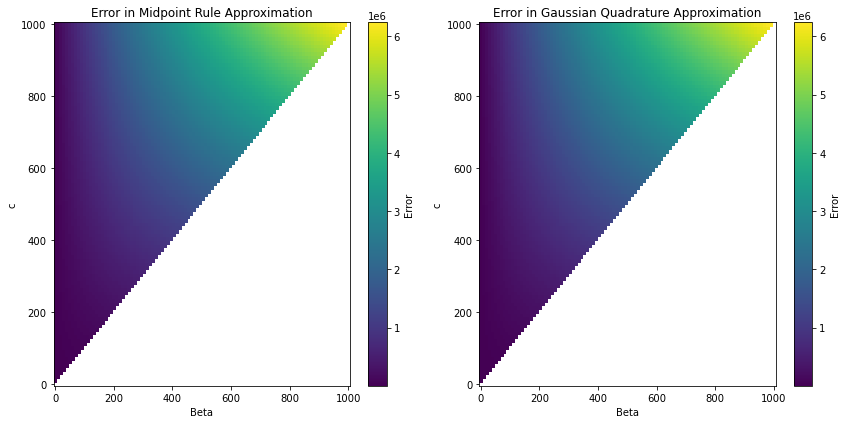

'--------------------Write your code above this line------------------------------'

In [14]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import scipy.integrate as integrate

# Constants
beta = 1  # Assuming beta = 1 for simplicity
c = 1     # Assuming c = 1 for simplicity
n = 10    # Number of subintervals or points for approximation

# Define the integrand function
def f(x):
    return beta * np.sqrt(1 - x**2 / beta**2) * np.sqrt(1 + (x / np.sqrt(beta**2 - x**2))**2)

# Midpoint Rule
delta_x = beta / n
midpoints = np.linspace(delta_x/2, beta - delta_x/2, n)
midpoint_sum = np.sum(f(midpoints))
midpoint_approximation = 2 * np.pi * delta_x * midpoint_sum

# Gaussian Quadrature
gaussian_approximation = 2 * np.pi * integrate.fixed_quad(f, 0, beta, n=n)[0]

print(midpoint_approximation,gaussian_approximation)

import matplotlib.pyplot as plt

# Function to calculate the exact surface area of the ellipsoid
def exact_surface_area(beta, c):
    e = np.sqrt(1 - beta**2 / c**2)
    return 2 * np.pi * beta**2 * (1 + (c / (beta * e)) * np.arcsin(e))

# Define the range of beta and c values
beta_values = np.linspace(0.001, 1000, 100)
c_values = np.linspace(0.001, 1000, 100)

# Create a meshgrid for beta and c values
beta_grid, c_grid = np.meshgrid(beta_values, c_values)

# Initialize arrays to store errors for each method
error_midpoint = np.zeros_like(beta_grid)
error_gaussian = np.zeros_like(beta_grid)

# Calculate errors
for i in range(len(beta_values)):
    for j in range(len(c_values)):
        beta = beta_values[i]
        c = c_values[j]

        # Exact area
        exact_area = exact_surface_area(beta, c)

        # Midpoint approximation
        delta_x = beta / n
        midpoints = np.linspace(delta_x/2, beta - delta_x/2, n)
        midpoint_sum = np.sum(f(midpoints))
        midpoint_area = 2 * np.pi * delta_x * midpoint_sum

        # Gaussian Quadrature approximation
        gaussian_area = 2 * np.pi * integrate.fixed_quad(f, 0, beta, n=n)[0]

        # Store errors
        error_midpoint[j, i] = np.abs(exact_area - midpoint_area)
        error_gaussian[j, i] = np.abs(exact_area - gaussian_area)

# Plot the error as a heatmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pcolormesh(beta_grid, c_grid, error_midpoint, shading='auto')
plt.colorbar(label='Error')
plt.title('Error in Midpoint Rule Approximation')
plt.xlabel('Beta')
plt.ylabel('c')

plt.subplot(1, 2, 2)
plt.pcolormesh(beta_grid, c_grid, error_gaussian, shading='auto')
plt.colorbar(label='Error')
plt.title('Error in Gaussian Quadrature Approximation')
plt.xlabel('Beta')
plt.ylabel('c')

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''

## C) 
Let's first consider the surface with non-deterministic quadrature techniques (Monte Carlo). As discussed in class, the following simple Monte Carlo simulation can be used to approximate a 2d integral,
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim U(a,b) $$
and we set $2\beta=c=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 



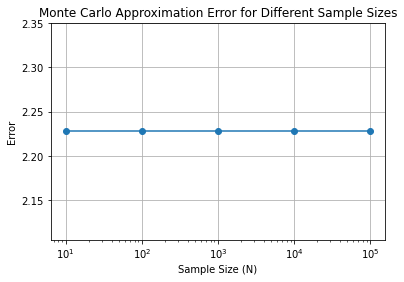

'--------------------Write your code above this line------------------------------'

In [15]:
'''--------------------Write your code below this line------------------------------'''
# Redefine the integrand function for the specific case 2beta = c = 1
def f_monte_carlo(x):
    return 0.5 * np.sqrt(1 - 4*x**2) * np.sqrt(1 + (2*x / np.sqrt(1 - 4*x**2))**2)

# Exact surface area for 2beta = c = 1
exact_area_2beta_c = exact_surface_area(0.5, 1)

# Sample sizes
N_values = [10, 100, 1000, 10000, 100000]

# Initialize array to store errors
errors_monte_carlo = []

# Monte Carlo approximation
for N in N_values:
    samples = np.random.uniform(0, 0.5, N)
    monte_carlo_approximation = 2 * np.pi * np.mean(f_monte_carlo(samples))
    error = np.abs(exact_area_2beta_c - monte_carlo_approximation)
    errors_monte_carlo.append(error)

# Plotting the error
plt.plot(N_values, errors_monte_carlo, marker='o')
plt.xscale('log')
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.title('Monte Carlo Approximation Error for Different Sample Sizes')
plt.grid(True)
plt.show()



'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h3><strong>Box–Muller transform </strong></h3>
</div>

Let's take a closer look at a joint probability,
$$ p(x,y)=\frac{1}{2\pi} e^{-(x^2+y^2)/2}$$
and changing from x,y to $\theta, R$, we have,
$$ p(R,\theta)=p(x,y) \frac{\partial |x,y|}{\partial |\theta,R|}= \frac{1}{2\pi} R e^{-(R^2)/2} $$
where $ \frac{\partial |x,y|}{\partial |\theta,R|}=\rm det|J|=R$. This is called the Rayleigh distribution, which coincides with the $\chi$ distribution with two degrees of freedom (DOF). Let's consider two random variables that follow a standard normal distribution, with $X$ and $Y$ denoted as $X, Y \sim \mathcal{N}(0, 1)$, representing two components of a vector. The cumulative distribution function (CDF) of the joint probability is given,
$$    P(\sqrt{X^2+Y^2}\leq R)=\int_0^{2\pi} \int_0^{R} r  \frac{1}{2\pi} e^{-r^2/2} dr d\theta. $$
It gives the same PDF as the probability density above. 

## D) 
Using the Box–Muller transform, write a python function that generates Gaussian distributed samples (return a numpy array) with mean $\mu$ and standard deviation $\sigma$. 

Plot the histogram with sampling size, N=[10,100,1000,10000,100000].



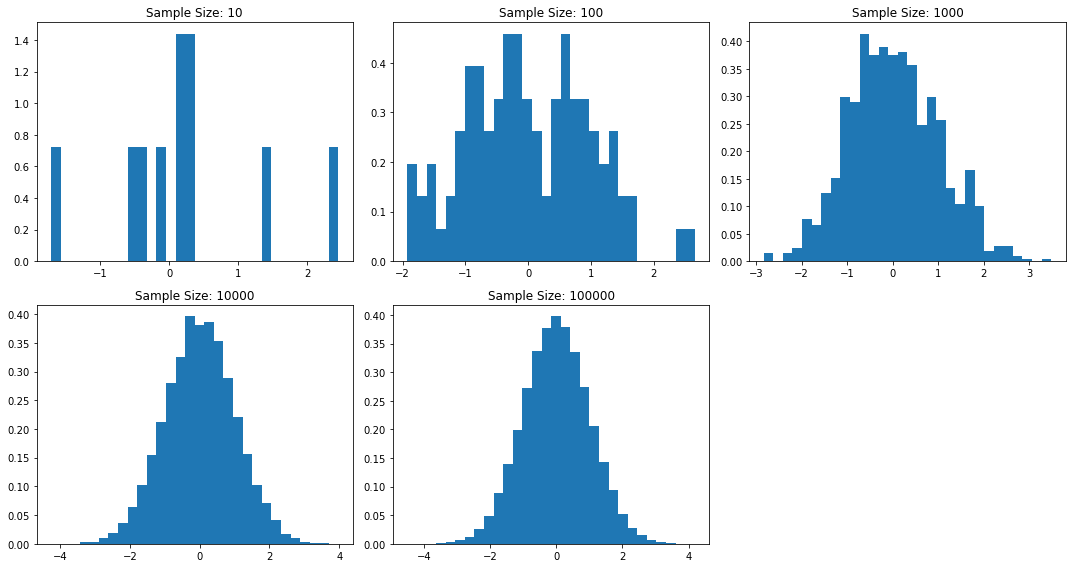

'--------------------Write your code above this line------------------------------'

In [10]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_samples(mu, sigma, size):
    """Generate Gaussian distributed samples using the Box-Muller transform."""
    # Generate two independent uniform random numbers
    U1, U2 = np.random.rand(2, size)
    
    # Box-Muller transform for standard normal variables
    Z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    
    # Transform to have specified mean and standard deviation
    return mu + sigma * Z0

# Parameters
mu = 0      # Mean
sigma = 1   # Standard deviation
sample_sizes = [10, 100, 1000, 10000, 100000]

# Plot histograms for each sample size
plt.figure(figsize=(15, 8))

for i, size in enumerate(sample_sizes, 1):
    samples = generate_gaussian_samples(mu, sigma, size)
    plt.subplot(2, 3, i)
    plt.hist(samples, bins=30, density=True)
    plt.title(f'Sample Size: {size}')

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''

## E) 
Do a simple Monte Carlo simulation, this time using different Gaussian-distributed samples as mentioned above, 
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim N(\mu,\sigma) $$
and we set $2a=c=1$. Let's first assume $\mu=0$ and $\sigma=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 


Next, test various $\mu$ and $\sigma$ with a fixed $N=10000$, calculate the error, and plot them. 
How is it different from C)? 





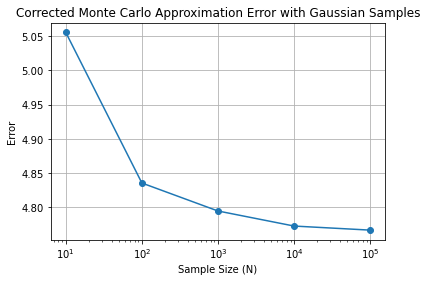

/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


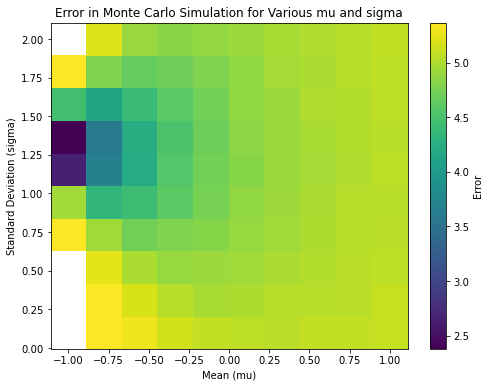

'--------------------Write your code above this line------------------------------'

In [11]:
'''--------------------Write your code below this line------------------------------'''
# Function to perform a corrected Monte Carlo simulation with Gaussian samples
def monte_carlo_gaussian_corrected(f, mu, sigma, size):
    # Generate Gaussian samples
    samples = np.random.normal(mu, sigma, size)

    # Filter samples to be within the valid range of the integrand
    valid_samples = samples[(samples >= 0) & (samples <= 0.5)]

    # Apply the integrand function to the valid samples
    f_values = f(valid_samples)

    # Calculate the Monte Carlo approximation, considering the proportion of valid samples
    proportion_of_valid_samples = len(valid_samples) / size
    approximation = 2 * np.pi * np.mean(f_values) * proportion_of_valid_samples

    return approximation

# Recalculate errors with the corrected Monte Carlo simulation
errors_monte_carlo_gaussian_corrected = []

for N in sample_sizes:
    monte_carlo_approximation_corrected = monte_carlo_gaussian_corrected(f_monte_carlo, 0, 1, N)
    error_corrected = np.abs(exact_area_2beta_c - monte_carlo_approximation_corrected)
    errors_monte_carlo_gaussian_corrected.append(error_corrected)

# Plotting the corrected error
plt.plot(sample_sizes, errors_monte_carlo_gaussian_corrected, marker='o')
plt.xscale('log')
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.title('Corrected Monte Carlo Approximation Error with Gaussian Samples')
plt.grid(True)
plt.show()

# Define ranges for mu and sigma
mu_values = np.linspace(-1, 1, 10)
sigma_values = np.linspace(0.1, 2, 10)

# Initialize a grid to store errors
error_grid = np.zeros((len(mu_values), len(sigma_values)))

# Fixed sample size
N_fixed = 10000

# Perform Monte Carlo simulations for each combination of mu and sigma
for i, mu in enumerate(mu_values):
    for j, sigma in enumerate(sigma_values):
        monte_carlo_approximation = monte_carlo_gaussian_corrected(f_monte_carlo, mu, sigma, N_fixed)
        error = np.abs(exact_area_2beta_c - monte_carlo_approximation)
        error_grid[i, j] = error

# Plotting the errors as a heatmap
mu_grid, sigma_grid = np.meshgrid(mu_values, sigma_values)

plt.figure(figsize=(8, 6))
plt.pcolormesh(mu_grid, sigma_grid, error_grid, shading='auto')
plt.colorbar(label='Error')
plt.xlabel('Mean (mu)')
plt.ylabel('Standard Deviation (sigma)')
plt.title('Error in Monte Carlo Simulation for Various mu and sigma')
plt.show()

'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h2><strong>Rejection Sampling </strong></h2>
</div>

Rejection sampling is used to generate data points that follow a particular complicated distribution. Let's say that the probability of observing a particle decay event at time t follows the probability density function (PDF),

$$p(x)=e^{-bt}cos^2(at), \hspace{0.2cm} t \geq 0$$. 

See below for an example when $a=4b=4$ (If you are interested, you can refer to the lecture notes on the Lorentzian function for energy dissipation). 

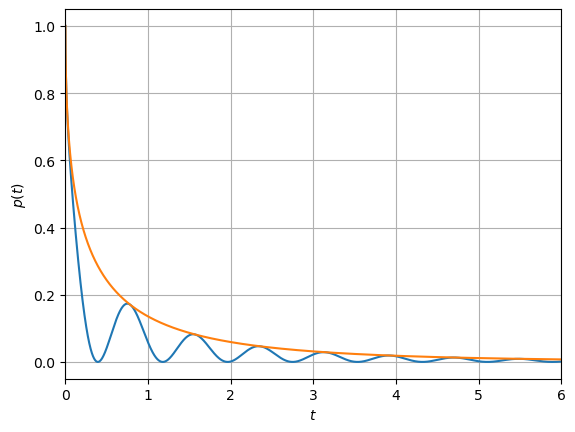

In [23]:
# Example
t = np.linspace(0, 6, 100000)
y = np.exp(-2*np.sqrt(t))*np.cos(4*t)**2
y2 = np.exp(-2*np.sqrt(t)) 
plt.plot(t, y)
plt.plot(t, y2)
plt.grid(True)
plt.xlim(0, 6)
plt.xlabel('$t$')
plt.ylabel('$p(t)$') 
plt.show()

## A) 
Write a rejection sampling function by using a **uniform proposal function**, 
$$f(t) \sim U(0,t_f)$$
to sample the PDF discussed above, with  $a=4b=4$. 

It should return a N sample numpy array. How do you select the $t_f$? Plot the resulting sample histogram with N=[100,1000,10000]. 



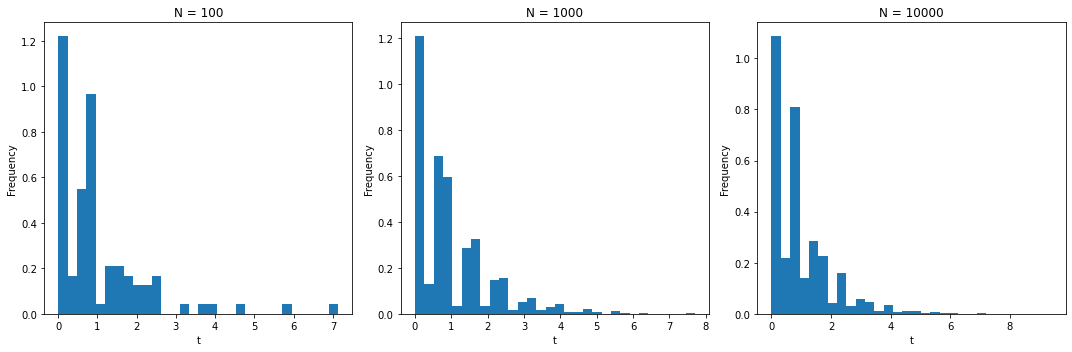

'--------------------Write your code above this line------------------------------'

In [13]:
'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt

a = 4
b = 1


def p(t):
    return np.exp(-b * t) * np.cos(a * t)**2


def rejection_sampling(N, tf):
    max_p = p(0)  # Maximum of p(x) in the range
    samples = []

    while len(samples) < N:
        t = np.random.uniform(0, tf)
        u = np.random.uniform(0, 1)
        if u <= p(t) / max_p:
            samples.append(t)

    return np.array(samples)


tf = 15
sample_sizes = [100, 1000, 10000]

plt.figure(figsize=(15, 5))

for i, N in enumerate(sample_sizes, 1):
    samples = rejection_sampling(N, tf)
    plt.subplot(1, 3, i)
    plt.hist(samples, bins=30, density=True)
    plt.title(f'N = {N}')
    plt.xlabel('t')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''

## B) 
Write a rejection sampling function by using a **exponential proposal function**, 
$$f(t) \sim Exp(1)=e^{-2t}$$
to sample the PDF discussed above, with the same $a=4b=4$. 

It should return a N sample numpy array. Plot the resulting sample histogram with N=[100,1000,10000]. Make a comparison between the uniform proposal function and exponential proposal function at various sample sizes. 


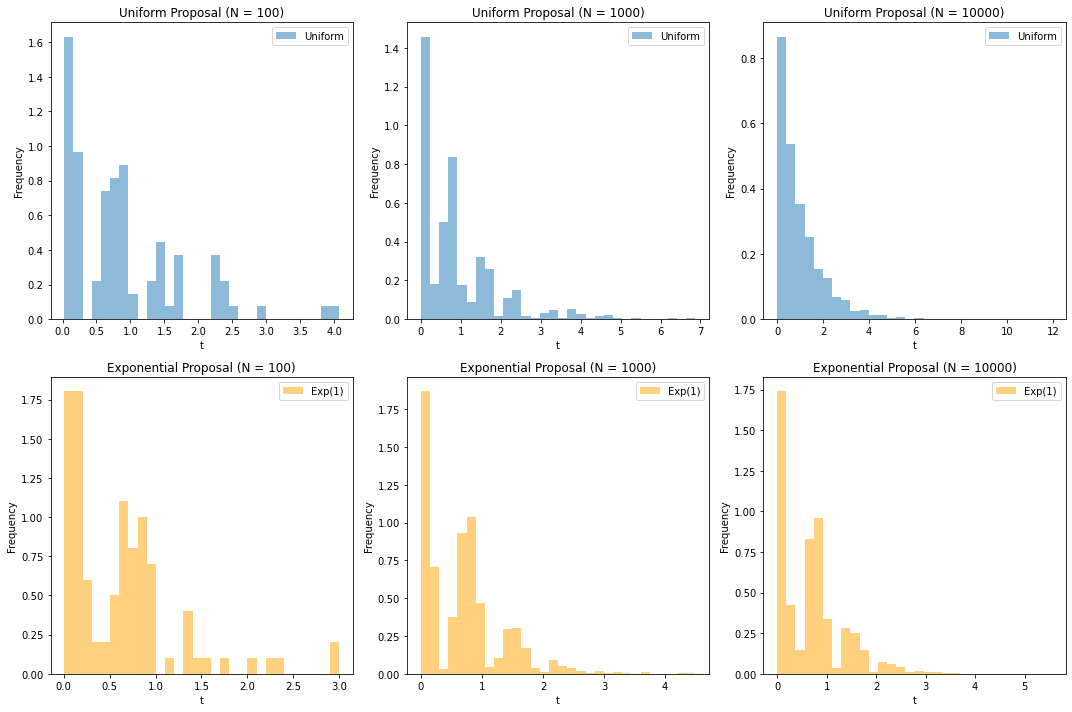

'--------------------Write your code above this line------------------------------'

In [14]:
'''--------------------Write your code below this line------------------------------'''

# Exponential proposal function (Exp(1))
def exp_proposal():
    return np.random.exponential(1/2)

# Rejection sampling function using exponential proposal
def rejection_sampling_exp(N, M):
    samples = []

    while len(samples) < N:
        t = exp_proposal()
        u = np.random.uniform(0, 1)
        if u <= p(t) / (M * np.exp(-2*t)):
            samples.append(t)

    return np.array(samples)

# Empirically determined M for scaling
M = 2.5  # This is an educated guess and may need adjustment based on empirical observations

# Plotting histograms for comparison
plt.figure(figsize=(15, 10))

for i, N in enumerate(sample_sizes, 1):
    # Uniform proposal samples
    samples_uniform = rejection_sampling(N, tf)

    # Exponential proposal samples
    samples_exp = rejection_sampling_exp(N, M)

    # Plot uniform proposal histogram
    plt.subplot(2, 3, i)
    plt.hist(samples_uniform, bins=30, density=True, alpha=0.5, label='Uniform')
    plt.title(f'Uniform Proposal (N = {N})')
    plt.xlabel('t')
    plt.ylabel('Frequency')
    plt.legend()

    # Plot exponential proposal histogram
    plt.subplot(2, 3, i + 3)
    plt.hist(samples_exp, bins=30, density=True, alpha=0.5, color='orange', label='Exp(1)')
    plt.title(f'Exponential Proposal (N = {N})')
    plt.xlabel('t')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Optimization </strong></h2>
</div>
 
<div style="text-align: center;">
    <h3><strong>   Gradient descent, Metropolis–Hastings algorithm, Simulated Annealing </strong></h3>
</div>
 

Gradient descent is a deterministic method for optimization. It requires the function to be differentiable and
convex.  The general formula for gradient descent is as follows:

Let $H(\theta)$ be the cost or loss function, where $\theta$ represents the model parameters. The goal is to find the optimal $\theta$ that minimizes $H(\theta)$.



The process of gradient descent involves starting with an initial guess for $\theta_i$, then iteratively applying the update rule until convergence. Convergence is typically determined by monitoring the change in the cost function or the norm of the gradient.


The update rule for gradient descent is as follows:

$$\theta_{i+1} = \theta_{i} - \alpha_i \cdot \nabla H(\theta_{i})$$

where $\alpha_i$ The learning rate, which is a hyperparameter that determines the step size of each update. The choice of the learning rate ($\alpha$) is crucial in gradient descent, as it can affect the algorithm's convergence and stability. It often requires experimentation to find an appropriate learning rate for a specific problem. The gradient ($\nabla H$) is a vector that contains the partial derivatives of the cost function with respect to each parameter in $\theta$. It represents the rate of change of the cost function with respect to each parameter and guides the updates.



<div style="text-align: center;">
    <h3><strong> $\phi4$ theory in 1D </strong></h3>
</div>

Let's say you have a noisy $\phi4$ theory in 1D, given by,

$$H=\theta^4-8\theta^2-2cos(4\pi \theta),$$

where $\theta$ is an order parameter. You want to find the ground state order parameter and energy (see the figure below). 

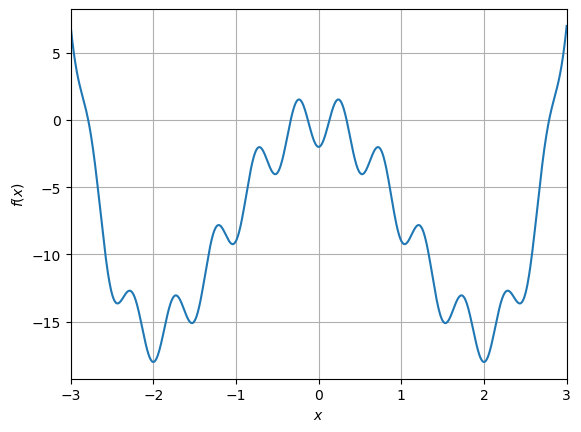

In [50]:
x = np.linspace(-3, 3, 1000)
y = x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$') 
plt.show()

## A) 
Using the gradient descent method, locate the global minimum starting with three initial guesses $\theta_0=-1,0.5,3$. For each descent step, plot a **red dot** on the above plot and save it locally until it converges. Make a **video** by processing your saved figures (you may want to look into "cv2.VideoWriter"). You should tune the learning parameter at each step! 

Do you get consistent results? 

<ipython-input-7-731fafebdc24>:16: RuntimeWarning: overflow encountered in double_scalars
  theta -= learning_rate * (4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta))
<ipython-input-7-731fafebdc24>:16: RuntimeWarning: invalid value encountered in double_scalars
  theta -= learning_rate * (4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta))
<ipython-input-7-731fafebdc24>:16: RuntimeWarning: invalid value encountered in sin
  theta -= learning_rate * (4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta))
<ipython-input-7-731fafebdc24>:8: RuntimeWarning: overflow encountered in power
  return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)
<ipython-input-7-731fafebdc24>:8: RuntimeWarning: overflow encountered in square
  return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)
<ipython-input-7-731fafebdc24>:8: RuntimeWarning: invalid value encountered in subtract
  return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)
<ipython-input-7-731fafebdc24>:8: RuntimeWarning: invalid valu

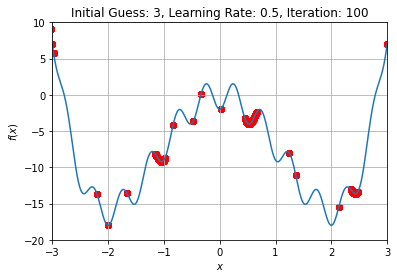

'--------------------Write your code above this line------------------------------'

In [7]:


'''--------------------Write your code below this line------------------------------'''
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

def phi4(theta):
    return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)


def gradient_descent(theta, learning_rate, num_iterations):
    theta_history = [theta]

    for i in range(num_iterations):
        # Update theta using the gradient descent formula
        theta -= learning_rate * (4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta))

        # Add the current theta to the history
        theta_history.append(theta)

    return np.array(theta_history)


x = np.linspace(-3, 3, 1000)
y = phi4(x)
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(-20, 10)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')


initial_guesses = [-1, 0.5, 3]
learning_rates = [0.01, 0.1, 0.5]
num_iterations = 100


fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('gradient_descent.mp4', fourcc, 1, (640, 480))

for guess in initial_guesses:
    for learning_rate in learning_rates:
        theta_history = gradient_descent(guess, learning_rate, num_iterations)
        
        frame_interval = 10  # Adjust as needed
        for i in range(0, num_iterations + 1, frame_interval):
            plt.scatter(theta_history[:i], phi4(theta_history[:i]), color='red')
            plt.title(f'Initial Guess: {guess}, Learning Rate: {learning_rate}, Iteration: {i}')
            file_name = f'current_frame_{guess}_{learning_rate}_{i}.png'
            plt.savefig(file_name)
            img = cv2.imread(file_name)
            video_writer.write(img)
            os.remove(file_name)


video_writer.release()
plt.show()






'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Elementary Hamiltonian Monte Carlo: Metropolis–Hastings algorithm </strong></h3>
</div>

As we discussed in class, Metropolis–Hastings algorithm is a Monte Carlo method that is used for optimization. In here, we will look at some basics. In Bayesian inference, the posterior can be expressed as Boltzmann factors, 

$$ P(\theta)=\frac{e^{-\beta H(\theta)}}{Z},$$

where $H$ is Hamiltonian, $\beta=1/kT$, and Z is the partition function. Let's start with an initial parameter guess $\theta_0$. Let's randomly move from $\theta_1 \to \theta_0+\Delta\theta$, where the step follows a Gaussian $\Delta \theta \sim \mathcal{N}(0,\sigma)$ (Markov process). Note, it must be symmetric. Then, the ratio,

$$   r=\frac{e^{-\beta H(\theta^*)}}{e^{-\beta H(\theta)}}=e^{-\beta H(\theta^*)+\beta H(\theta)}=e^{-\beta \Delta H(\theta^*,\theta)}.$$

If $r >1$, we accept it and set $\theta_1 \to \theta_0$. On the other hand, $r<1$, we accept it with probability $r$ and set $\theta_1 \to \theta_0$. If rejected, keep $\theta_0=\theta_0$. This is an elementary demonstration of the Hamiltonian Monte Carlo (no auxiliary momentum and kinetic energy). 


## B)
Use the Metropolis–Hastings algorithm above to estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different $\beta$. 

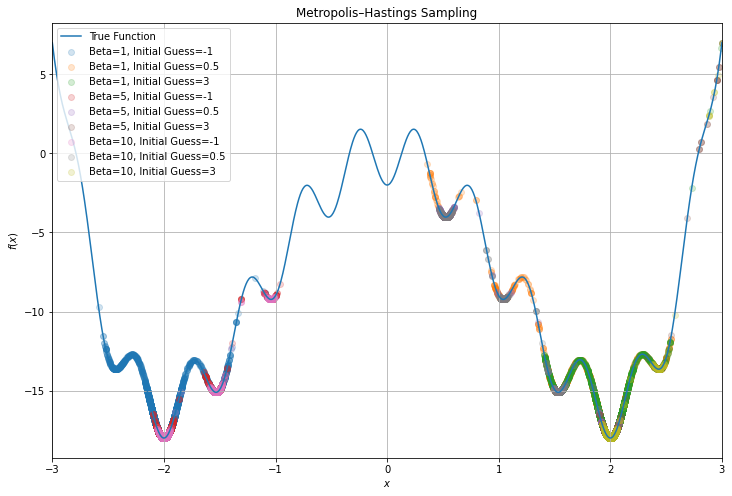

'--------------------Write your code above this line------------------------------'

In [8]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def phi4(theta):
    return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)

def metropolis_hastings(theta, beta, sigma, num_steps):
    theta_history = [theta]

    for _ in range(num_steps):
        theta_prime = theta + np.random.normal(0, sigma)
        delta_H = phi4(theta_prime) - phi4(theta)
        acceptance_ratio = np.exp(-beta * delta_H)
        if np.random.uniform(0, 1) < acceptance_ratio:
            theta = theta_prime
        theta_history.append(theta)

    return np.array(theta_history)


plt.figure(figsize=(12, 8)) 

x = np.linspace(-3, 3, 1000)
y = phi4(x)
plt.plot(x, y, label='True Function')
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

initial_guesses = [-1, 0.5, 3]
num_steps = 10000 
sigma = 0.1


for beta in [1, 5, 10]:
    for guess in initial_guesses:
        theta_history = metropolis_hastings(guess, beta, sigma, num_steps)
        # Plotting with a smaller alpha value for better visibility of individual paths
        plt.scatter(theta_history, phi4(theta_history), label=f'Beta={beta}, Initial Guess={guess}', alpha=0.2)


plt.legend(loc='upper left')
plt.title('Metropolis–Hastings Sampling')
plt.show()


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Simulated Annealing  </strong></h3>
</div>
Simulated Annealing is a probabilistic optimization algorithm inspired by the annealing process in metal. The cooling schedule is usually defined as the following,

$$ \beta_{i+1} = \beta_{i} +\delta_i,$$

where we update the inverse temperature each step. This update will change the Metropolis criterion, 

$$r_i=e^{-\beta_i \Delta H(\theta^*,\theta)}> u_i $$

where $u_i \sim U(0,1)$. The cooling schedule is a critical aspect of Simulated Annealing. It determines the rate at which the temperature decreases. 



## C)
Add a cooling schedule to the Metropolis–Hastings algorithm above. Then, estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different cooling schedule e.g. $\delta_i$. Make a graphical comparison of the convergence steps with cooling and without cooling. 

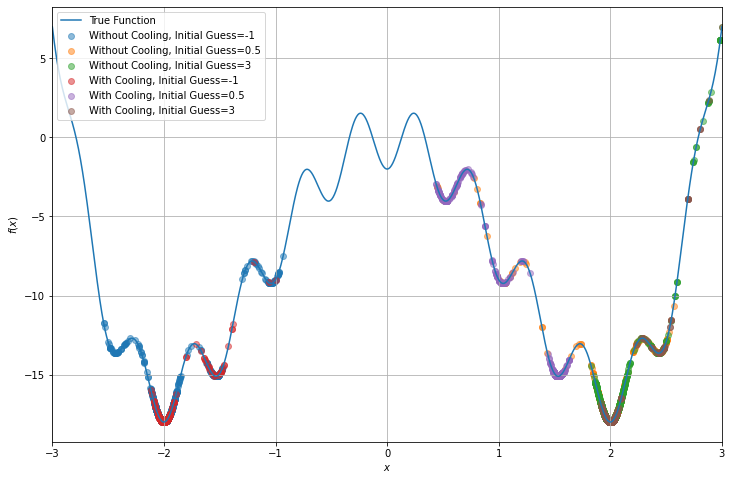

'--------------------Write your code above this line------------------------------'

In [9]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

# Define the noisy phi4 function
def phi4(theta):
    return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)

# Define the Metropolis–Hastings algorithm with cooling schedule
def metropolis_hastings_with_cooling_schedule(theta, initial_beta, sigma, num_steps, cooling_schedule):
    theta_history = [theta]

    for i in range(num_steps):
        theta_prime = theta + np.random.normal(0, sigma)
        delta_H = phi4(theta_prime) - phi4(theta)
        acceptance_ratio = np.exp(-initial_beta * delta_H)

        if np.random.uniform(0, 1) < acceptance_ratio:
            theta = theta_prime
        initial_beta += cooling_schedule[i]
        theta_history.append(theta)

    return np.array(theta_history)

plt.figure(figsize=(12, 8))

x = np.linspace(-3, 3, 1000)
y = phi4(x)
plt.plot(x, y, label='True Function')
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

initial_guesses = [-1, 0.5, 3]
num_steps = 1000
sigma = 0.1

for guess in initial_guesses:
    cooling_schedule_without = np.zeros(num_steps)
    theta_history = metropolis_hastings_with_cooling_schedule(guess, initial_beta=1, sigma=sigma, num_steps=num_steps, cooling_schedule=cooling_schedule_without)
    plt.scatter(theta_history, phi4(theta_history), label=f'Without Cooling, Initial Guess={guess}', alpha=0.5)

delta_schedule_cooling = np.linspace(0, 0.1, num_steps)  # Example cooling schedule
for guess in initial_guesses:
    theta_history = metropolis_hastings_with_cooling_schedule(guess, initial_beta=1, sigma=sigma, num_steps=num_steps, cooling_schedule=delta_schedule_cooling)
    plt.scatter(theta_history, phi4(theta_history), label=f'With Cooling, Initial Guess={guess}', alpha=0.5)

plt.legend(loc='upper left')
plt.show()


'''--------------------Write your code above this line------------------------------'''